<a href="https://colab.research.google.com/github/imraunav/Computer-vision-EE511/blob/main/1_layer_ae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import numpy as np
from tqdm import tqdm
from torchsummary import summary
import matplotlib.pyplot as plt

In [ ]:
train_dataset = MNIST(root = './',
      train = True,
      transform = ToTensor(),
      target_transform = None,
      download = True)
test_dataset = MNIST(root = './',
      train = False,
      transform = ToTensor(),
      target_transform = None,
      download = False)

100%|██████████| 9912422/9912422 [00:00<00:00, 127312208.12it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 100862359.55it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 50727933.78it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 3480184.28it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_dataset)

In [ ]:
class Encoder(nn.Module):
  def __init__(self, latent_dim):
    super().__init__()
    self.l1 = nn.Linear(28*28, latent_dim)
  def forward(self, x):
    return F.tanh(self.l1(x))


class Decoder(nn.Module):
  def __init__(self, latent_dim):
    super().__init__()
    self.l1 = nn.Linear(latent_dim, 28*28)
  def forward(self, x):
    return self.l1(x)

class AutoEncoder(nn.Module):
  def __init__(self, latent_dim=128):
    super().__init__()
    self.encoder = Encoder(latent_dim)
    self.decoder = Decoder(latent_dim)

  def forward(self, x):
    original_shape = x.shape
    x = x.view(x.size(0), -1)
    x = self.encoder(x)
    x = self.decoder(x)
    return x.reshape(original_shape)

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Using device: ", device)

Using device:  cuda


In [ ]:
latent_dim = 128
autoencoder = AutoEncoder(latent_dim).to(device)
summary(autoencoder, (28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]         100,480
           Encoder-2                  [-1, 128]               0
            Linear-3                  [-1, 784]         101,136
           Decoder-4                  [-1, 784]               0
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.77
Estimated Total Size (MB): 0.79
----------------------------------------------------------------


In [ ]:
optimizer = Adam(autoencoder.parameters())
crit = nn.MSELoss()

In [ ]:
max_epoch = 50
train_loss = []

autoencoder.train()
for epoch in range(max_epoch):
  print(f"Epoch:{epoch+1}")
  running_loss = 0
  nbatch = 0
  for batch in tqdm(train_loader):
    img, label = batch
    img = img.to(device)

    optimizer.zero_grad()
    back = autoencoder(img)
    loss = crit(img, back)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    nbatch += 1
  train_loss.append(running_loss/nbatch)
  print(f"Train loss: {train_loss[-1]}")

Epoch:1


100%|██████████| 938/938 [00:08<00:00, 105.91it/s]


Train loss: 0.013873473580763825
Epoch:2


100%|██████████| 938/938 [00:07<00:00, 122.94it/s]


Train loss: 0.005314375356788924
Epoch:3


100%|██████████| 938/938 [00:08<00:00, 110.47it/s]


Train loss: 0.004803462271223158
Epoch:4


100%|██████████| 938/938 [00:08<00:00, 110.09it/s]


Train loss: 0.004669576324323919
Epoch:5


100%|██████████| 938/938 [00:07<00:00, 119.01it/s]


Train loss: 0.004626852175248648
Epoch:6


100%|██████████| 938/938 [00:09<00:00, 97.63it/s] 


Train loss: 0.0045870339563950455
Epoch:7


100%|██████████| 938/938 [00:09<00:00, 97.35it/s]


Train loss: 0.004573835893524195
Epoch:8


100%|██████████| 938/938 [00:07<00:00, 119.58it/s]


Train loss: 0.004547866907761073
Epoch:9


100%|██████████| 938/938 [00:08<00:00, 110.82it/s]


Train loss: 0.004536440754349012
Epoch:10


100%|██████████| 938/938 [00:07<00:00, 123.27it/s]


Train loss: 0.004540610941561825
Epoch:11


100%|██████████| 938/938 [00:08<00:00, 107.91it/s]


Train loss: 0.004533660123253794
Epoch:12


100%|██████████| 938/938 [00:09<00:00, 102.79it/s]


Train loss: 0.004521846783154809
Epoch:13


100%|██████████| 938/938 [00:08<00:00, 117.05it/s]


Train loss: 0.0045230601457998095
Epoch:14


100%|██████████| 938/938 [00:09<00:00, 102.06it/s]


Train loss: 0.004519164985937398
Epoch:15


100%|██████████| 938/938 [00:08<00:00, 109.81it/s]


Train loss: 0.004504668729395659
Epoch:16


100%|██████████| 938/938 [00:08<00:00, 117.05it/s]


Train loss: 0.004503594862589084
Epoch:17


100%|██████████| 938/938 [00:08<00:00, 106.90it/s]


Train loss: 0.00450717777545963
Epoch:18


100%|██████████| 938/938 [00:07<00:00, 123.89it/s]


Train loss: 0.004504368255492736
Epoch:19


100%|██████████| 938/938 [00:08<00:00, 109.66it/s]


Train loss: 0.004501844853111136
Epoch:20


100%|██████████| 938/938 [00:08<00:00, 111.37it/s]


Train loss: 0.004497070236554516
Epoch:21


100%|██████████| 938/938 [00:07<00:00, 117.90it/s]


Train loss: 0.004493844309903141
Epoch:22


100%|██████████| 938/938 [00:09<00:00, 102.19it/s]


Train loss: 0.0045012324894053626
Epoch:23


100%|██████████| 938/938 [00:08<00:00, 110.96it/s]


Train loss: 0.0044948320891926566
Epoch:24


100%|██████████| 938/938 [00:08<00:00, 110.12it/s]


Train loss: 0.004489524108764809
Epoch:25


100%|██████████| 938/938 [00:08<00:00, 108.87it/s]


Train loss: 0.004494314215012959
Epoch:26


100%|██████████| 938/938 [00:07<00:00, 124.72it/s]


Train loss: 0.004489194533265412
Epoch:27


100%|██████████| 938/938 [00:08<00:00, 108.24it/s]


Train loss: 0.004486840731625173
Epoch:28


100%|██████████| 938/938 [00:08<00:00, 108.07it/s]


Train loss: 0.004496825552150321
Epoch:29


100%|██████████| 938/938 [00:07<00:00, 118.92it/s]


Train loss: 0.004488976124717769
Epoch:30


100%|██████████| 938/938 [00:08<00:00, 110.29it/s]


Train loss: 0.0044926686896515616
Epoch:31


100%|██████████| 938/938 [00:07<00:00, 125.71it/s]


Train loss: 0.004484017633759518
Epoch:32


100%|██████████| 938/938 [00:08<00:00, 107.00it/s]


Train loss: 0.004488543139399289
Epoch:33


100%|██████████| 938/938 [00:09<00:00, 103.18it/s]


Train loss: 0.004478893849675033
Epoch:34


100%|██████████| 938/938 [00:08<00:00, 116.75it/s]


Train loss: 0.004485924293332771
Epoch:35


100%|██████████| 938/938 [00:08<00:00, 110.76it/s]


Train loss: 0.004490747620145093
Epoch:36


100%|██████████| 938/938 [00:07<00:00, 122.55it/s]


Train loss: 0.004493291873776757
Epoch:37


100%|██████████| 938/938 [00:08<00:00, 109.29it/s]


Train loss: 0.0044874235722563985
Epoch:38


100%|██████████| 938/938 [00:09<00:00, 101.80it/s]


Train loss: 0.004474712872822115
Epoch:39


100%|██████████| 938/938 [00:08<00:00, 115.84it/s]


Train loss: 0.0044954587801742845
Epoch:40


100%|██████████| 938/938 [00:09<00:00, 101.68it/s]


Train loss: 0.0044780299792300535
Epoch:41


100%|██████████| 938/938 [00:08<00:00, 107.52it/s]


Train loss: 0.004486068775668851
Epoch:42


100%|██████████| 938/938 [00:07<00:00, 118.48it/s]


Train loss: 0.004478544276555194
Epoch:43


100%|██████████| 938/938 [00:08<00:00, 108.49it/s]


Train loss: 0.004480863578055602
Epoch:44


100%|██████████| 938/938 [00:07<00:00, 124.29it/s]


Train loss: 0.004481472369871223
Epoch:45


100%|██████████| 938/938 [00:08<00:00, 105.04it/s]


Train loss: 0.0044844605915768665
Epoch:46


100%|██████████| 938/938 [00:09<00:00, 102.86it/s]


Train loss: 0.004477377991620968
Epoch:47


100%|██████████| 938/938 [00:08<00:00, 115.20it/s]


Train loss: 0.0044830014220754635
Epoch:48


100%|██████████| 938/938 [00:09<00:00, 103.14it/s]


Train loss: 0.004480699806271602
Epoch:49


100%|██████████| 938/938 [00:08<00:00, 107.97it/s]


Train loss: 0.00447910058839338
Epoch:50


100%|██████████| 938/938 [00:07<00:00, 117.64it/s]

Train loss: 0.004481213708678241


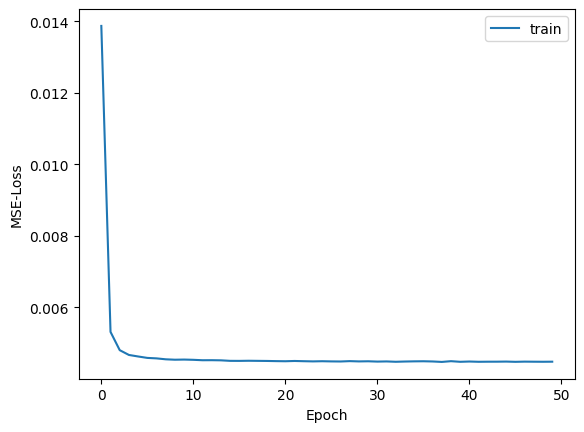

In [ ]:
plt.plot(train_loss)
plt.legend(['train'])
plt.xlabel('Epoch')
plt.ylabel('MSE-Loss')
plt.show()

In [ ]:
autoencoder.eval()
nbatch = 0
running_loss = 0
for batch in tqdm(test_loader):
  img, label = batch
  img = img.to(device)
  back = autoencoder(img)
  loss = crit(img, back)
  running_loss += loss.item()
  nbatch += 1
print()
print("Test loss: ", running_loss/nbatch)

100%|██████████| 10000/10000 [00:06<00:00, 1504.65it/s]


Test loss:  0.004428191989770858


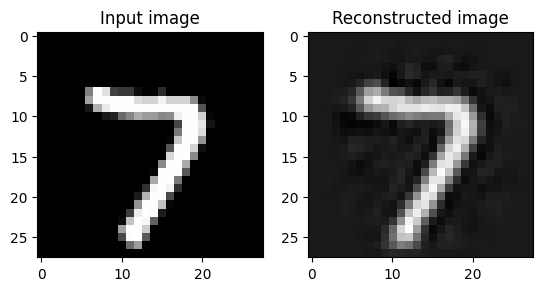

In [ ]:
i = np.random.randint(0, 10_000)
img, _ = test_dataset.__getitem__(i)
back = autoencoder(img.to(device)).detach().to(torch.device("cpu"))

plt.subplot(1,2,1)
plt.title("Input image")
plt.imshow(img.numpy()[0], cmap="gray")

plt.subplot(1,2,2)
plt.title("Reconstructed image")
plt.imshow(back.numpy()[0], cmap="gray")
plt.show()